In [1]:
# importing libraries

import numpy as np
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Populating the interactive namespace from numpy and matplotlib


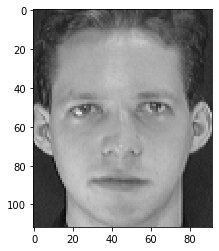

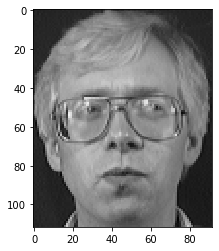

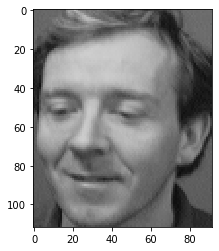

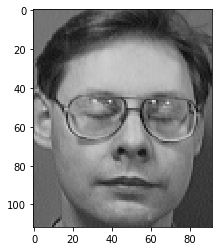

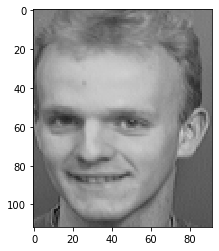

In [2]:
# displaying some sample images from random folders

base_path = 'facial_data/Datasets/att_faces_combined/'
    
img=cv2.imread(base_path + 's1/1.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's2/3.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's3/5.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's4/9.pgm')
imgplot = plt.imshow(img)
plt.show()

img=cv2.imread(base_path + 's5/6.pgm')
imgplot = plt.imshow(img)
plt.show()

leny, lenx, z = img.shape

In [3]:
# creating feature vector for images from training
      
def create_feature_vec(num_train) :  

    feature_vector = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(1, num_train + 1) : # for each image inside the folder si
            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            feature_vector.append(img_row)

    feature_vector = np.array(feature_vector)
    feature_vector_T = np.transpose(feature_vector)
    print("feature vector = ", feature_vector)
    print("shape of feature vector = ", feature_vector.shape)
    print("\n")

    return feature_vector

In [4]:
# mean vector

def create_mean_vec(feature_vector) :

    mean = np.mean(feature_vector, axis = 0)
    mean_T = np.transpose(mean)
    print("mean vector = ", mean)
    print("shape of mean vector = ", mean.shape)
    print("\n")
    return mean, mean_T

In [5]:
# deviation matrix

def create_dev_mat(feature_vector, mean) :

    dev_mat = feature_vector - mean
    dev_mat_T = np.transpose(dev_mat)
    print("deviation matrix = ", dev_mat)
    print("shape of deviation matrix = ", dev_mat.shape)
    print("\n")
    return dev_mat, dev_mat_T

In [6]:
# covariance matrix

def create_cov_matrix(dev_mat, dev_mat_T) :

    cov_mat = np.dot(dev_mat, dev_mat_T)
    print("covariance matrix = ", cov_mat)
    print("shape of covariance matrix = ", cov_mat.shape)
    print("\n")
    return cov_mat

In [7]:
# eigenvalues and eigenvectors

def create_eig_val_vec(cov_mat) :

    eigen_val, eigen_vec = np.linalg.eig(cov_mat)

    eigen_val_s = np.sort(eigen_val)
    eigen_vec_s = eigen_vec[:, eigen_val.argsort()]
    eigen_vec_s = np.fliplr(eigen_vec_s)

    eigen_vec = eigen_vec_s
    eigen_val = eigen_val_s
    
    print("shape of eigen values vector -->",eigen_val.shape)
    print("shape of eigen vector matrix -->",eigen_vec.shape)
    print("\n")

    return eigen_val, eigen_vec

In [8]:
def select_k_eigenvectors(eigen_vec, k) :
    return eigen_vec[:, :k]

In [9]:
def create_eigen_faces(dec_feature_vec, dev_mat) :
    eig_face = np.dot(np.transpose(dec_feature_vec), dev_mat)
    return eig_face

In [10]:
def signature_each_face(eig_face, dev_mat_T) :
    sig_face = np.dot(eig_face, dev_mat_T)
    print("dimension of signature = ", sig_face.shape)
    return sig_face

In [11]:
def prediction_vec(proj_test_face, sig_face, k, num_test, num_train) :    
    min_idx_each_img = []

    for i in range(num_test * 40) : # for each test image
        test_img_proj = proj_test_face[:, i]
        test_img_proj = np.reshape(test_img_proj, (k, 1))

        dist_vec = []

        for j in range(num_train * 40) : # for each signature of training images
            sig_each_face = sig_face[:, j]
            sig_each_face = np.reshape(sig_each_face, (k, 1))
            dist_vec.append(euclidean_dist(test_img_proj, sig_each_face))

        dist_vec = np.array(dist_vec)
        #print(dist_vec)
        min_dist = dist_vec[0]
        min_idx = 0

        for j in range(len(dist_vec)) :
            if dist_vec[j] < min_dist :
                min_dist = dist_vec[j]
                min_idx = j
        min_idx_each_img.append(min_idx // num_train + 1) 
    return min_idx_each_img

In [12]:
def euclidean_dist(a, b) :
    dist = a - b
    sq_dist = np.dot(np.transpose(dist), dist)
    sq_dist = np.sqrt(sq_dist)
    return sq_dist

In [13]:
# creating testing vector
def create_test_vec(num_test) :

    test_vec = list(range(1, 41))
    test_vec =  [ele for ele in test_vec for i in range(num_test)] 

    print("expected values = ",test_vec)
    print("\n")

    return test_vec

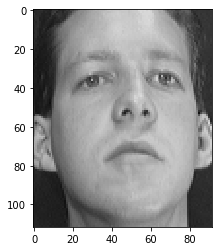

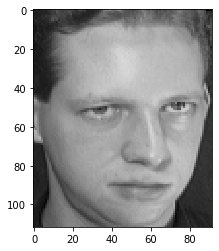

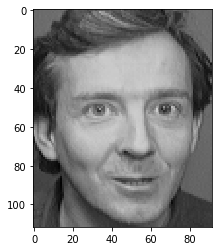

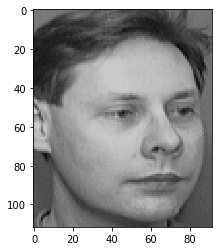

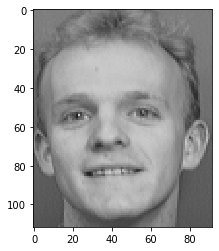

In [14]:
# displaying some sample images from random folders
    
img=cv2.imread(base_path + 's1/9.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's1/10.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's3/10.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's4/10.pgm')
imgplot = plt.imshow(img)
plt.show()

img=cv2.imread(base_path + 's5/10.pgm')
imgplot = plt.imshow(img)
plt.show()

In [15]:
# create the test matrix
    
def create_test_matrix(num_train) :
    
    test_mat = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(num_train + 1, 11) :

            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            test_mat.append(img_row)

    test_mat = np.array(test_mat)
    print("test matrix = ", test_mat)
    print("shape of test matrix = ", test_mat.shape)
    print("\n")
    return test_mat        

In [16]:
# mean zero

def create_mean_zero_test(test_mat, mean) :
    
    dev_test_mat = test_mat - mean
    dev_test_mat_T = np.transpose(dev_test_mat)
    print("mean zero test matrix = ", dev_test_mat)
    print("shape of mean zero test matrix = ", dev_test_mat.shape)
    print("\n")
    return dev_test_mat, dev_test_mat_T

In [17]:
# final testing

def testing_for_k(k, eigen_vec, dev_mat, dev_mat_T, dev_test_mat_T, num_test, num_train) :
    
    dec_feature_vec = select_k_eigenvectors(eigen_vec, k)
    
    eig_face = create_eigen_faces(dec_feature_vec, dev_mat)
    
    sig_face = signature_each_face(eig_face, dev_mat_T)
    
    proj_test_face = np.dot(eig_face, dev_test_mat_T)
    
    min_idx_each_img = prediction_vec(proj_test_face, sig_face, k, num_test, num_train)
    
    return min_idx_each_img

In [18]:
# calculating accuracy

def accuracy(min_idx_each_img, test_vec, num_test) :
    count = 0
    for i in range(num_test * 40) :
        if min_idx_each_img[i] == test_vec[i] :
            count = count + 1
    return (count / (num_test * 40)) * 100

In [19]:
# output for various train-test split cases

def diff_cases(num_train, num_test) :
    
    # getting feature vector
    feature_vector = create_feature_vec(num_train)
    
    # getting mean
    mean, mean_T = create_mean_vec(feature_vector)
    
    # getting deaviation matrix
    dev_mat, dev_mat_T = create_dev_mat(feature_vector, mean)
    
    # getting covariance matrix
    cov_mat = create_cov_matrix(dev_mat, dev_mat_T)
    
    # getting eigen values and eigen vectors
    eigen_val, eigen_vec = create_eig_val_vec(cov_mat)
    
    # getting test matrix
    test_mat = create_test_matrix(num_train)
    
    # getting deviation test matrix
    dev_test_mat, dev_test_mat_T = create_mean_zero_test(test_mat, mean)
    
    # getting actual test values
    test_vec = create_test_vec(num_test)
    
    # accuracy for k values
    
    k_val = []
    acc_val = []
    for k in range(51) :
        min_idx_each_img = testing_for_k(k, eigen_vec, dev_mat, dev_mat_T, dev_test_mat_T, num_test, num_train)
        
        k_val.append(k)
        acc_val.append(accuracy(min_idx_each_img, test_vec, num_test)) 
    
    print("Plotting accuracy vs k")    
    plt.plot(k_val, acc_val)
    plt.xlabel('Increasing value of k')
    plt.ylabel('Accuracy')

    plt.xticks(np.arange(min(k_val), max(k_val) + 1, 5.0))
    plt.yticks(np.arange(0, 100, 10.0))

    plt.show()
    
    print("maximum accuracy for {}-{} split = {}".format(num_train * 10, num_test * 10, max(acc_val)))

feature vector =  [[ 48  45  45 ...  46  47  46]
 [ 60  58  68 ...  33  31  34]
 [ 39  44  59 ...  28  27  29]
 ...
 [123 128 126 ...  44  39  42]
 [129 130 127 ...  95  92  93]
 [125 121 122 ...  43  35  40]]
shape of feature vector =  (320, 10304)


mean vector =  [85.503125 85.6      85.771875 ... 70.875    72.559375 73.5625  ]
shape of mean vector =  (10304,)


deviation matrix =  [[-37.503125 -40.6      -40.771875 ... -24.875    -25.559375 -27.5625  ]
 [-25.503125 -27.6      -17.771875 ... -37.875    -41.559375 -39.5625  ]
 [-46.503125 -41.6      -26.771875 ... -42.875    -45.559375 -44.5625  ]
 ...
 [ 37.496875  42.4       40.228125 ... -26.875    -33.559375 -31.5625  ]
 [ 43.496875  44.4       41.228125 ...  24.125     19.440625  19.4375  ]
 [ 39.496875  35.4       36.228125 ... -27.875    -37.559375 -33.5625  ]]
shape of deviation matrix =  (320, 10304)


covariance matrix =  [[14520940.71233399  6843978.97170899  9707034.00920898 ...
    294706.07795898  1300224.36233398    99

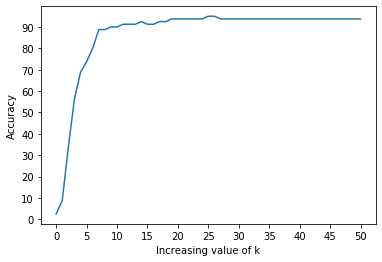

maximum accuracy for 80-20 split = 95.0


In [20]:
diff_cases(8, 2)

feature vector =  [[ 48  45  45 ...  46  47  46]
 [ 60  58  68 ...  33  31  34]
 [ 39  44  59 ...  28  27  29]
 ...
 [129 130 127 ...  95  92  93]
 [125 121 122 ...  43  35  40]
 [119 118 120 ...  88  92  85]]
shape of feature vector =  (360, 10304)


mean vector =  [85.45555556 85.55833333 85.78611111 ... 71.525      73.33055556
 74.66944444]
shape of mean vector =  (10304,)


deviation matrix =  [[-37.45555556 -40.55833333 -40.78611111 ... -25.525      -26.33055556
  -28.66944444]
 [-25.45555556 -27.55833333 -17.78611111 ... -38.525      -42.33055556
  -40.66944444]
 [-46.45555556 -41.55833333 -26.78611111 ... -43.525      -46.33055556
  -45.66944444]
 ...
 [ 43.54444444  44.44166667  41.21388889 ...  23.475       18.66944444
   18.33055556]
 [ 39.54444444  35.44166667  36.21388889 ... -28.525      -38.33055556
  -34.66944444]
 [ 33.54444444  32.44166667  34.21388889 ...  16.475       18.66944444
   10.33055556]]
shape of deviation matrix =  (360, 10304)


covariance matrix =  [[1446

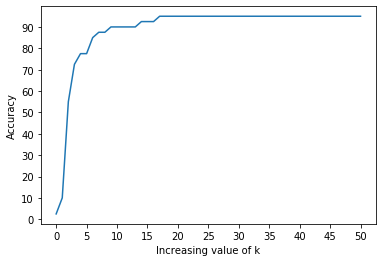

maximum accuracy for 90-10 split = 95.0


In [21]:
diff_cases(9, 1)

feature vector =  [[ 48  45  45 ...  46  47  46]
 [ 60  58  68 ...  33  31  34]
 [ 39  44  59 ...  28  27  29]
 ...
 [130 126 123 ...  39  42  40]
 [128 129 126 ...  90  91  84]
 [123 128 126 ...  44  39  42]]
shape of feature vector =  (240, 10304)


mean vector =  [84.82916667 85.1        85.19583333 ... 70.25833333 71.25833333
 72.075     ]
shape of mean vector =  (10304,)


deviation matrix =  [[-36.82916667 -40.1        -40.19583333 ... -24.25833333 -24.25833333
  -26.075     ]
 [-24.82916667 -27.1        -17.19583333 ... -37.25833333 -40.25833333
  -38.075     ]
 [-45.82916667 -41.1        -26.19583333 ... -42.25833333 -44.25833333
  -43.075     ]
 ...
 [ 45.17083333  40.9         37.80416667 ... -31.25833333 -29.25833333
  -32.075     ]
 [ 43.17083333  43.9         40.80416667 ...  19.74166667  19.74166667
   11.925     ]
 [ 38.17083333  42.9         40.80416667 ... -26.25833333 -32.25833333
  -30.075     ]]
shape of deviation matrix =  (240, 10304)


covariance matrix =  [[1477

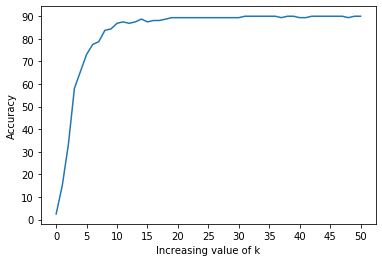

maximum accuracy for 60-40 split = 90.0


In [22]:
diff_cases(6, 4)